<a href="https://colab.research.google.com/github/Om4587/Scientific-Analysis/blob/main/Project_2(Law_of_Large_Numbers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# simulation parameters

population_size = 2.3e5

sample_size = 50
number_of_samples = 500

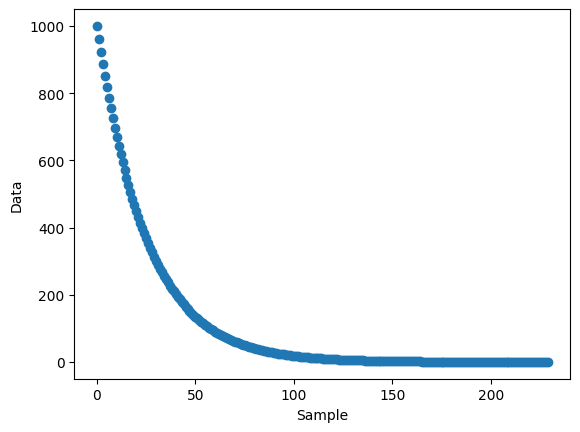

In [ ]:
# Generate the population of numbers

population = 1 / np.logspace(np.log10(.001),np.log10(10),int(population_size))

# true mean
trueMean = np.mean(population)
skip = int(1e3)
plt.plot(population[::skip],'o')
plt.xlabel('Sample')
plt.ylabel('Data')
plt.show()

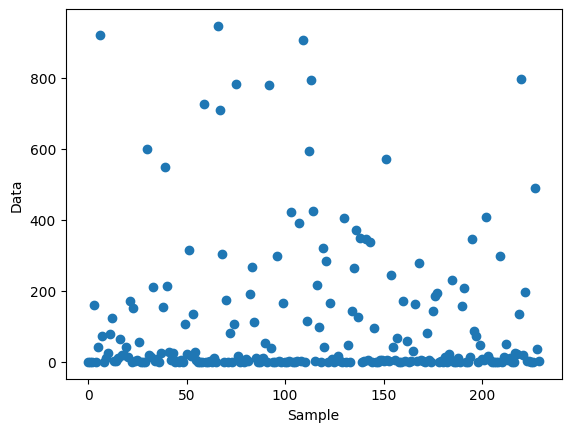

In [ ]:
# shuffle the data
np.random.shuffle(population)

plt.plot(population[::skip],'o')
plt.xlabel('Sample')
plt.ylabel('Data')
plt.show()

In [ ]:
samplemeans = np.zeros(number_of_samples)

for expi in range(number_of_samples):
    samplemeans[expi] = np.mean( np.random.choice(population,size=sample_size) )

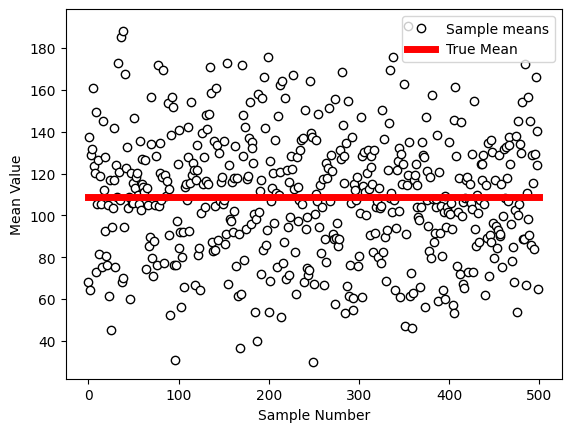

In [ ]:
plt.plot(samplemeans,'ko',label='Sample means',markerfacecolor = 'w')
plt.plot([0,number_of_samples],[trueMean,trueMean],'r',linewidth=5,label = 'True Mean')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.show()

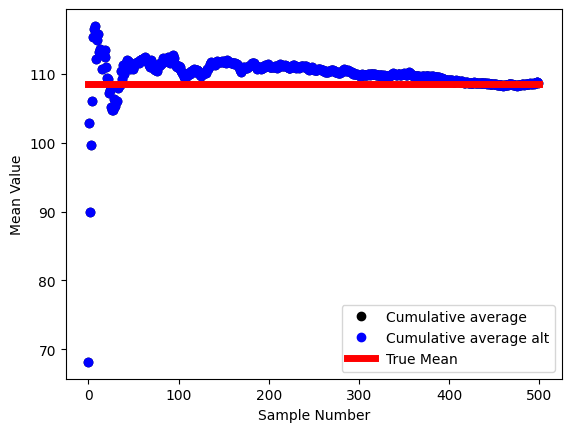

In [ ]:
# cumulitivite average

cumave = np.zeros(number_of_samples)
for i in range(number_of_samples):
    cumave[i] = np.mean(samplemeans[:i+1])

cumave2 = np.cumsum(samplemeans) / np.arange(1,number_of_samples+1)

plt.plot(cumave,'ko',label = 'Cumulative average')
plt.plot(cumave2,'bo',label = 'Cumulative average alt')
plt.plot([0,number_of_samples],[trueMean,trueMean],'r',linewidth=5,label = 'True Mean')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')

plt.show()

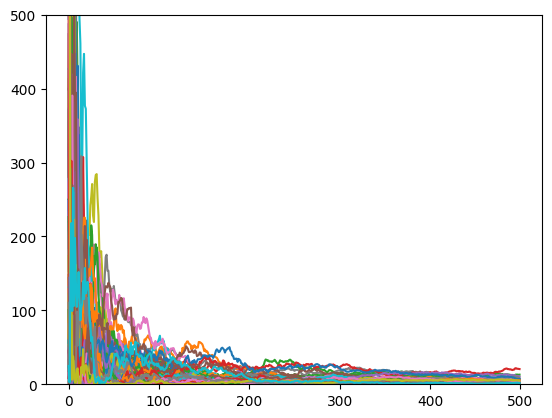

In [ ]:
number_of_meta_samples = 100

cumaves = np.zeros((number_of_meta_samples,number_of_samples))
allsamplemeans = np.zeros((number_of_meta_samples,number_of_samples))
for metai in range(number_of_meta_samples):
    for expi in range(number_of_samples):
        samplemeans[expi] = np.mean( np.random.choice(population,size=sample_size) )

    # now we get cumulative average divergences
    tmp = np.cumsum(samplemeans) / np.arange(1,number_of_samples+1)
    cumaves[metai,:] = (tmp - trueMean)**2
    # Store the sample means
    allsamplemeans[metai,:] = samplemeans

# now plot
plt.plot(cumaves.T)
plt.ylim([0,500])
plt.show()

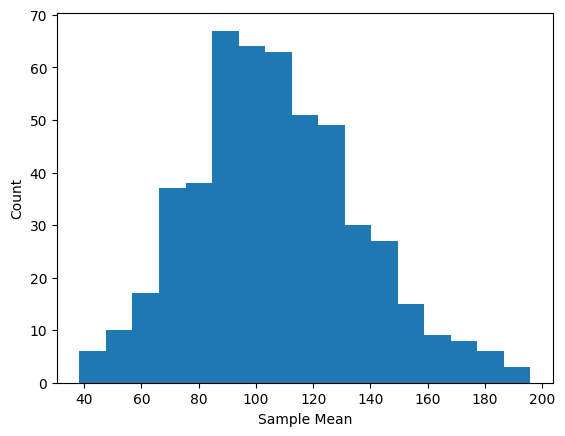

In [ ]:
plt.hist(samplemeans,bins='fd') # Freedman-Diaconis
plt.xlabel('Sample Mean')
plt.ylabel('Count')
plt.show()

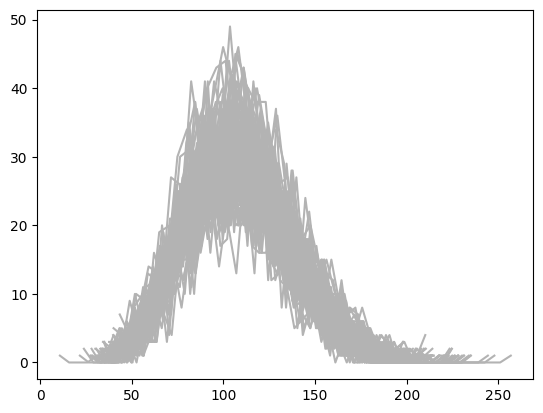

In [ ]:
nbins = 40

for i in range(number_of_meta_samples):
    y,x = np.histogram(allsamplemeans[i,:],bins = nbins)
    x = (x[1:]+x[:-1]) / 2
    plt.plot(x,y,color=[.7,.7,.7])
plt.show()